Representing Continous Functions on a Digital Computer
-----------------------------------------------------

Computers are inherently discrete, digital devices, while real phenomenon are continuous.  Thus simulating physical, continuous
systems and models on a digital computer always, by necessity, involves approximating the model using discrete representations of the
continous processes.  In this lecture notebook, we will discuss in a bit more detail the nature of this discretization that is being
performed, and the problems and limitations you should be aware of.  We will return to these issues in other parts of the course as well,
including in particular when we talk about the accuracy of digital representations of continuous values in the next Lecture 04.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Vectorizing a Function
----------------------

As mentioned in a previous notebook, vectorizing a function means that we create a function that takes numpy arrays as input,
and returns a numpy array as output which is the result of applying the function to all of the input values in the input
array(s).  For example, in basic Python, we normally write functions that take a scalar value as input, and returns 
a result.  Say we wanted to write a function that takes a single variable `x` as input and computes the function:

$$
f(x) = x^2 e^{-x^2}
$$

In [2]:
def f(x):
    return x**2.0 * math.exp(-x**2.0)

x = 1
print(x)
print(f(x))

1
0.36787944117144233


In this case, the value of the defined function at the point $x = 1$ was computed by the function and returned.  However, if we
want to compute the function at multiple points, we can call the function multiple times, for example:

In [3]:
x = 0.0
while (x < 2.0):
    print(x, f(x))
    x += 0.1

0.0 0.0
0.1 0.009900498337491683
0.2 0.03843157756609294
0.30000000000000004 0.08225380667441055
0.4 0.13634300623459383
0.5 0.19470019576785122
0.6 0.25116347738557115
0.7 0.3001869331503639
0.7999999999999999 0.33746715138755107
0.8999999999999999 0.36033503364058234
0.9999999999999999 0.36787944117144233
1.0999999999999999 0.3608187081101637
1.2 0.34117597250225534
1.3 0.31183799554815184
1.4000000000000001 0.27608250500524817
1.5000000000000002 0.23714825526419464
1.6000000000000003 0.19790013553484723
1.7000000000000004 0.1606152544471859
1.8000000000000005 0.12689102012071798
1.9000000000000006 0.09765716718752483


This works fine, but is inconvenient for, for example, plotting, where we would like to have all of the $x$ values in a single list
and all of the corresponding $f(x)$ values in another list, so that we can have matplotlib plot them.  We could
imagine, instead, modifying the function to accept a list of $x$ values, and return the result of computing the 
function on all of the values in the input list. Our original function will not work with regular Python lists:

In [4]:
x = [float(v) / 10.0 for v in range(0, 21)]
print(x)


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]


In [5]:
try:
    f(x)
except TypeError:
    print("A TypeError was generated because operand ** not supported for a list.")
    print("Call f(x) directly outside of a try/catch block to see the exception that is thrown.")

A TypeError was generated because operand ** not supported for a list.
Call f(x) directly outside of a try/catch block to see the exception that is thrown.


We could, of course, create a python function that expects a list, and returns the corresponding list after applying the function:

In [6]:
def f_list(x):
    y = []
    for x_i in x:
        y_i = x_i**2.0 * np.exp(-x_i**2.0)
        y.append(y_i)
    return y

print(x)
print(f_list(x))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
[0.0, 0.009900498337491683, 0.03843157756609294, 0.08225380667441054, 0.13634300623459383, 0.19470019576785122, 0.25116347738557115, 0.3001869331503639, 0.3374671513875511, 0.36033503364058234, 0.36787944117144233, 0.3608187081101637, 0.34117597250225534, 0.31183799554815184, 0.2760825050052482, 0.23714825526419475, 0.1979001355348473, 0.1606152544471861, 0.1268910201207181, 0.097657167187525, 0.07326255555493671]


However, using the NumPy library makes this all much simpler and more direct.  Plus since vector operations on NumPy arrays are
much faster and more efficient then writing the corresponding loops to compute calculations on each individual element, performing
the previous using NumPy vector operations will also be much faster and more efficient.  For example, if we have a NumPy
array of our x values, we can directly compute our function, since operations like taking the exponent and multiplying vectors
are by default supported with and between NumPy vectors.  So we have:

In [7]:
x = np.arange(0.0, 2.1, 0.1)
y = x**2.0 * np.exp(-x**2.0)
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[0.         0.0099005  0.03843158 0.08225381 0.13634301 0.1947002
 0.25116348 0.30018693 0.33746715 0.36033503 0.36787944 0.36081871
 0.34117597 0.311838   0.27608251 0.23714826 0.19790014 0.16061525
 0.12689102 0.09765717 0.07326256]


And as a final step, we often need to have a Python function that represents such a mathematical transformation.  We can define
a vectorized Python funciton, that takes an array as input, and returns a new array that is the result of applying the function
to each of the input values, like this:

In [8]:
def f(x):
    return x**2.0 * np.exp(-x**2.0)

x = np.arange(0.0, 2.1, 0.1)
print(x)
print(f(x))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[0.         0.0099005  0.03843158 0.08225381 0.13634301 0.1947002
 0.25116348 0.30018693 0.33746715 0.36033503 0.36787944 0.36081871
 0.34117597 0.311838   0.27608251 0.23714826 0.19790014 0.16061525
 0.12689102 0.09765717 0.07326256]


The astute student may have realized that we have actually (mostly) arrived back at our original function.  Simple
functions like the previous one are inherently vectorized already, since basic mathematical operations,
such as multiplication, addition, exponentiation, etc. are directly supported between and with numpy arrays.  I did change the `exp()`
function to explicitly use the version of the exponential from the numpy library, by specifying `np.exp()`.  There are many
mathematical functions, like `sin()`, `log()`, `exp()`, etc. that are defined both in the standard Python `math` library,
as well as in NumPy.  In general, if you want your function to be vectorized and safe to accept a NumPy array as an input
parameter over which a result should be computed for all values, then you should explicitly make sure that you are using the
NumPy versions of mathematical functions, as these are guaranteed to support vectorized operations.

Sometimes, as we briefly discussed in a previous Lecture notebook, you have functions that you would like to have vectorized
versions of, but the statement of the function is not so directly translatable into a vectorized operation.  In the NumPy
Lecture notebook, we presented the Heaviside function.  As another example, it is common to see conditional functions
in use for scientific modeling.  

$$
f(x) = \begin{cases}
    x^4 - x,  & \displaystyle \text{if} \quad x \ge 1 \\
    -x^4 - x, & \text{if} \quad x \le -1  \\
    0,        & \text{otherwise} \\
\end{cases}
$$


Using `if` / `elif` / `else` control blocks will not work in this case for a vector of $x$ values, unless we explicity 
write loops to examine each value of $x$ individually.  In this case, if we want to write a vectorized version of such 
a conditional function, we can use the `np.where()` method fairly efficiently:

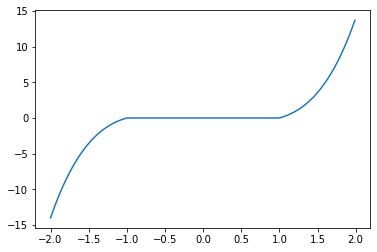

In [9]:
def f(x):
    y = np.where(x >= 1,  (x**4.0 - x), 0)
    y = np.where(x <= -1, (-x**4.0 - x), y)
    return y

x = np.arange(-2, 2, 0.01)
y = f(x)

plt.plot(x, y);

Curve Plotting
---------------

In mathematics, we visualize a function $f(x)$ by drawing the curve $y = f(x)$ in a 2-dimensional $xy$ coordinate system.  In math, $x$ and
$y$ usually represent real valued numbers.  In such a system, $x$ is known as the independent variable, and $y$ is the dependent variable,
since its value depends on which particular value $x$ is fed into the function.  We can use any variables besides $x$ and $y$, for example
$t$ is often used as an independent variable representing time.

There are in fact an infinite number of points between  any start and end point on a number line.  But of course 
it is impossible to actually represent, and plot, an infinite amount of data.  If nothing else a digital computer
is a physical device, with a limited, finite amount of memory.  So technically, when we plot a curve on a digital computer (displayed on
a digitial display composed of individual pixels), we need to plot a finite set of calculated points of the functions, and we draw 
straight line segments between the points on the curve we have plotted.  Of course, if we choose points that are close enough together
(for some value of close enough) then we will exceed our visual systems ability to perceive the straight line approximations we are making
between the actual points we have calculated and plotted of the curve being visualized.  

A quick example should make this point clearer.  All of you should be familiar with the basic trigonemetric functions, like sine, cosine,
tangent, etc.  For example, the `sin` function varies in $2\pi$ cycles, ranging over output values from $-1.0$ to $1.0$.  If we want to
plot and visualize the values of the continuous, real valued `sin` function:

$y = sin(x)$

from $0$ to $2\pi$, we might try something like the following.  As we mentioned, we can't actually calculate the infinite number of
values for the `sin` function for all the infinite number of points 'x' in the range from $0$ to $2\pi$.  Instead we might pick a 
finite number of points, say points that are $\frac{pi}{4}$ evenly spaced distance apart, starting from 0.  We can generate the
selected `x` locations that we want to calculate the `sin` function of, using the NumPy `linspace` function, like this:

In [10]:
x = np.arange(0.0, 2.0*np.pi, np.pi/4.0)
print(x)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


And we can use NumPy's vectorized version of the `sin` function, to calculate the approximate value of the `sin` function for each of
these `x` values, like this:

In [11]:
y = np.sin(x)
print(y)

[ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01]


Then to visualize the shape of the `sin` function using these values, we can plot our corresponding x and y values, like this:

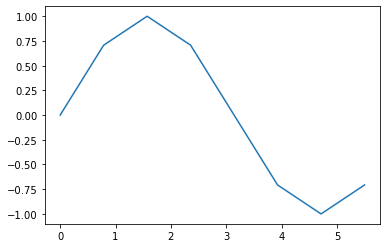

In [12]:
plt.plot(x, y);

We can see the actual points that were used to draw the line segments between with matplotlib like this:

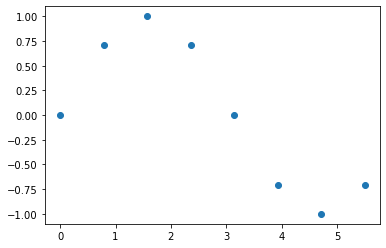

In [13]:
plt.plot(x, y, 'o');

As you can see from these figures, this really doesn't look like the smooth `sin` function we should all be familiar with.  Here, since we
did not divide the independent variable `x` into a sufficient number of input points, we can clearly see the segments between the points
on the curve we are plotting.  Of course, we can easily increase our accuracy.  Our original creation of the `x` range of points consisted
of 8 evenly spaced points over the `x` range we wanted to visualize.  Lets switch over to using the NumPy `linspace` function, to try
increasing the number of evenly spaced points we create over the range we want to visualize, and see what happens.  For example, instead
of 8 points, lets try 15 points and see what happens (here I'll plot both the line segments and points on the same figure):

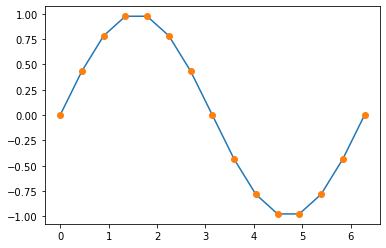

In [14]:
x = np.linspace(0, 2*np.pi, 15)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x, y, 'o');

This is better, but you can still make out the individual line segments.  You should try different values for the linear spacing, and see
how that affects the plot.  Of course, we can increase this easily, to as many `x` values
as needed, in order to push the display past the limits of our visual systems and/or past the limits of our computer displays.  In fact, 
digital displays, typically have only 1024, or 2048, or 4096 pixel widths (some are getting even larger than this now, but we 
still don't see displays of say 100's of thousands of pixels in width).  When visualizing a plot on your video display, there will be
little benefit in calculating more discrete x values than the pixel width count of your display, as values less than that will by
necessity have to be mapped to the same pixel location on the display.

With that in mind, on my display of 1440x900, most likely 1500 discrete `x` locations will be more than adequate for any situation to
smoothly approximate the visual appearance of any curve we would like to plot.  So we can plot:

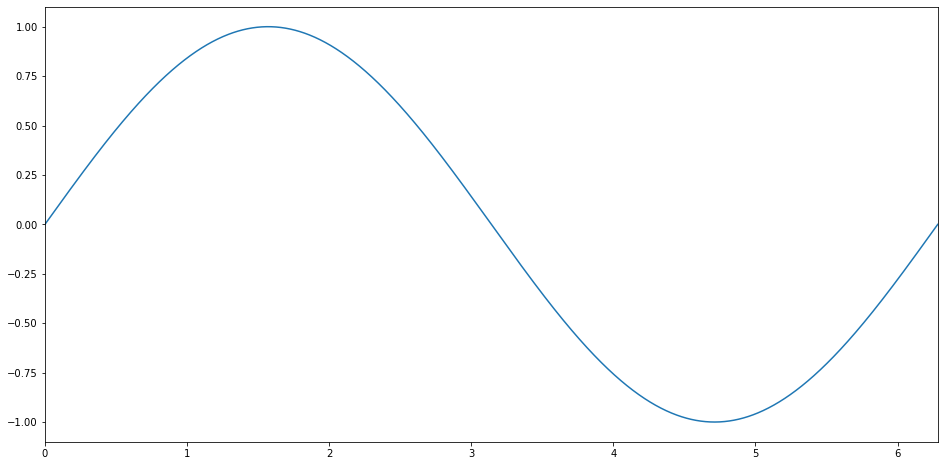

In [15]:
x = np.linspace(0, 2*np.pi, 1500)
y = np.sin(x)
plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.1, 1.1]);

In general, as the previous example has shown, you should always be aware that when we represent functions and visualize them on
a digital computer, we are making discrete approximations of the real valued functions being represented.  Normally, as above, when
we need to visualize a function over some range $x$, we will choose the $x_i$ coordintates to be equaly spaced over the interval:

$x_i = a + ih$

$h = \frac{b - a}{n-1}$

Where $a$ and $b$ are the begin and end points of the interval we want to visualize, and h is the calcuated step size if we want
to display $n$ evenly space points in the interval, labeled $x_i$.  As discussed, we normally choose $n$ to be large enough so that the 
visualization of the curve will be appear smooth on the intended output display device.

Likewise, as we did above with the `sin` function, we normally (in scientific environments like the Python scientific programming stack or
the Matlab environment), calculate the values of the dependent variable ($y$ in this case), using a vectorized function or operation.
This simply means that the function accepts a vector matrix (a NumPy array type) of values, and returns the result of applying the
function to all values in the array.  Using our previous notation, we divide the interval `x` into a vector of
$x_i$ evenly spaced values $x = [x_0, x_1, x_2, ... x_{n-1}]$  A vectorized functions takes the vector $x$ of $n$ values, and returns
a new vector $y = [y_0, y_1, y_2, ..., y_{n-1}]$ of the values of the function $f(x)$ at each of the corresponding $x_i$ locations.
We will talk a little bit more about vectorized functions below.

## Versions